# creating models

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch 
import pandas as pd
 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
indf = pd.read_excel('../data/clean/indf.xlsx').drop('Unnamed: 0', axis=1)
outdf = pd.read_excel('../data/clean/outdf.xlsx').drop('Unnamed: 0', axis=1)

TEST_SPLIT = int(0.80 * len(indf))
X_train, y_train, X_test, y_test = indf.iloc[:TEST_SPLIT], outdf.iloc[:TEST_SPLIT], indf.iloc[TEST_SPLIT:], outdf.iloc[TEST_SPLIT:]
len(X_train), len(X_test), len(indf)

(9228, 2308, 11536)

In [5]:
indf

,Series date,Length Overall,Maximum Beam,Draft,Displacement,DLR,IMS Division,Dynamic Allowance,Age Allowance,Mainsail measured,...,Mizzen measured,Mizzen rated,Headsail Flying measured,Headsail Flying rated,Asymmetric measured,Asymmetric rated,Quad. Mainsail measured,Quad. Mainsail rated,Mizzen Staysail measured,Mizzen Staysail rated
0,0.926917,0.129929,0.092691,0.166967,0.012646,0.198474,0.666667,0.200000,1.000000,0.049676,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.880755,0.139393,0.102733,0.062528,0.019525,0.406542,0.000000,0.800000,1.000000,0.031359,...,0.056285,0.056638,0.050080,0.148463,0.032390,0.135318,0.0,0.0,0.0,0.0
2,0.940614,0.161120,0.107443,0.207639,0.019245,0.264876,0.666667,0.000000,1.000000,0.069499,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.964422,0.098186,0.070207,0.155250,0.004272,0.078507,1.000000,0.000000,0.800821,0.044433,...,0.000000,0.000000,0.000000,0.000000,0.043438,0.181478,0.0,0.0,0.0,0.0
4,0.964422,0.098186,0.070207,0.155250,0.004272,0.078507,1.000000,0.000000,0.800821,0.044433,...,0.000000,0.000000,0.000000,0.000000,0.043438,0.181478,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,0.993278,0.114077,0.099711,0.163024,0.009759,0.174742,1.000000,0.000000,0.133470,0.042830,...,0.000000,0.000000,0.055708,0.165149,0.044585,0.186268,0.0,0.0,0.0,0.0
11532,0.817285,0.081329,0.061409,0.076386,0.008794,0.436856,0.666667,0.680000,1.000000,0.027189,...,0.000000,0.000000,0.000000,0.000000,0.020251,0.084603,0.0,0.0,0.0,0.0
11533,0.931483,0.134661,0.095001,0.179811,0.010956,0.191282,1.000000,0.000000,1.000000,0.055850,...,0.000000,0.000000,0.000000,0.000000,0.055785,0.233060,0.0,0.0,0.0,0.0
11534,0.926917,0.125631,0.108509,0.183979,0.010565,0.177380,0.666667,0.146667,1.000000,0.051593,...,0.000000,0.000000,0.000000,0.000000,0.054677,0.228430,0.0,0.0,0.0,0.0


In [6]:
outdf

,Beat Angles 6 kt,Beat Angles 8 kt,Beat Angles 10 kt,Beat Angles 12 kt,Beat Angles 14 kt,Beat Angles 16 kt,Beat Angles 20 kt,Beat Angles 24 kt,Beat VMG 6 kt,Beat VMG 8 kt,...,Run VMG 20 kt,Run VMG 24 kt,Gybe Angles 6 kt,Gybe Angles 8 kt,Gybe Angles 10 kt,Gybe Angles 12 kt,Gybe Angles 14 kt,Gybe Angles 16 kt,Gybe Angles 20 kt,Gybe Angles 24 kt
0,42.900002,40.799999,39.099998,37.799999,37.099998,36.599998,36.200001,36.599998,3.74,4.58,...,8.46,9.370000,140.800003,146.899994,150.500000,155.800003,165.100006,176.800003,177.699997,176.399994
1,49.400002,48.000000,47.200001,47.200001,47.500000,48.200001,49.599998,51.700001,2.63,3.24,...,7.71,8.320000,144.800003,148.699997,152.500000,156.800003,165.100006,175.000000,179.000000,179.000000
2,42.500000,40.200001,38.599998,37.799999,37.299999,37.099998,37.500000,38.500000,4.14,4.96,...,8.70,9.510000,141.399994,146.500000,150.699997,155.600006,163.300003,175.399994,178.300003,178.100006
3,42.599998,40.200001,38.799999,38.700001,38.400002,38.200001,38.900002,40.599998,4.08,4.85,...,11.50,14.570000,143.100006,145.800003,149.699997,149.600006,146.500000,145.699997,146.199997,150.300003
4,42.599998,40.200001,38.799999,38.700001,38.400002,38.200001,38.900002,40.599998,4.08,4.85,...,11.50,14.570000,143.100006,145.800003,149.699997,149.600006,146.500000,145.699997,146.199997,150.300003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,44.099998,41.700001,40.000000,38.900002,38.400002,38.299999,39.200001,40.400002,3.53,4.33,...,8.27,10.320000,143.300003,146.899994,148.000000,149.399994,148.399994,146.600006,143.100006,139.500000
11532,43.799999,42.000000,41.299999,40.599998,39.900002,39.599998,39.799999,40.900002,2.96,3.56,...,6.98,7.520000,145.300003,151.000000,153.800003,159.399994,173.600006,178.100006,179.000000,179.000000
11533,42.400002,40.000000,38.200001,37.400002,37.099998,37.299999,37.400002,38.900002,3.99,4.80,...,8.90,11.450000,143.000000,146.199997,149.300003,151.300003,149.399994,146.699997,143.600006,144.199997
11534,42.799999,40.599998,38.799999,37.599998,37.599998,37.500000,37.500000,38.700001,3.77,4.61,...,8.91,11.580000,143.100006,146.500000,148.899994,150.600006,148.600006,146.500000,143.300003,143.500000


In [7]:
import os 
if not os.path.exists('../models'):
    os.mkdir('../models')
    
tesatTensor = torch.tensor(indf.iloc[0].values, dtype=torch.float32)
tesatTensor

tensor([0.9269, 0.1299, 0.0927, 0.1670, 0.0126, 0.1985, 0.6667, 0.2000, 1.0000,
        0.0497, 0.0446, 0.0445, 0.0651, 0.2816, 0.2816, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

#### custom dataset and dataloader

In [8]:
from torch.utils.data import Dataset, DataLoader
col0 = outdf.columns.tolist()[0]

# making dataset
class MyDataset(Dataset):
    def __init__(self, input_df, output_df):
        self.input_df = input_df 
        self.output_df = output_df 
    
    def __len__(self):
        return len(self.input_df)
    
    def __getitem__(self, idx):
        input_data = self.input_df.iloc[idx].values 
        output_data = self.output_df.iloc[idx] 
        
        input_tensor = torch.tensor(input_data, dtype=torch.float32)
        output_tensor = torch.tensor(output_data, dtype=torch.float32)
        return input_tensor, output_tensor
    
train_dataset = MyDataset(X_train, y_train[col0])
test_dataset = MyDataset(X_test, y_test[col0]) 

# making dataloader
train_dataloader = DataLoader(dataset=train_dataset, 
                              batch_size=32,
                              shuffle=True, 
                              num_workers=os.cpu_count())
test_dataloader = DataLoader(dataset=test_dataset, 
                             batch_size=32, 
                             shuffle=False, 
                             num_workers=os.cpu_count())

# test 
print(len(train_dataloader), len(test_dataloader))
x, y = next(iter(train_dataloader))
print(x.shape, y.shape)

289 73


torch.Size([32, 25]) torch.Size([32])


In [9]:
from tqdm.auto import tqdm
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module,
              device=device):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss = 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred = model(X).squeeze()

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    return test_loss

def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer,
               device=device):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss = 0 
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X).squeeze()

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    return train_loss

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module, 
          optimizer: torch.optim.Optimizer, 
          epochs: int, 
          device: torch.device = device):
    results = {"train_loss": [], 
               "test_loss": []}
    
    for epoch in tqdm(range(epochs)):
        train_loss = train_step(model=model, 
                                dataloader=train_dataloader, 
                                loss_fn=loss_fn, 
                                optimizer=optimizer,
                                device=device)
        test_loss = test_step(model=model, 
                              dataloader=test_dataloader, 
                              loss_fn=loss_fn,
                              device=device)
        
        print(f"epoch: {epoch}, train_loss: {train_loss:.4f}, test_loss: {test_loss:.4f}")
        results['train_loss'].append(train_loss)
        results['test_loss'].append(test_loss)
    
    return results
    

/home/kuba/miniconda3/envs/pytorch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
def plot_results(res):
    test_loss = res['test_loss']
    train_loss = res['train_loss'] 
    epochs = range(len(train_loss))
    
    plt.figure(figsize=(10, 7)) 
    plt.plot(epochs, train_loss, label="train_loss") 
    plt.plot(epochs, test_loss, label="test_loss") 
    plt.title("loss")
    plt.legend()
    plt.show()

def plot_results_since(res, since):
    test_loss = res['test_loss'][since:]
    train_loss = res['train_loss'][since:]
    epochs = range(len(train_loss))
    
    plt.figure(figsize=(10, 7)) 
    plt.plot(epochs, train_loss, label="train_loss") 
    plt.plot(epochs, test_loss, label="test_loss") 
    plt.title("loss")
    plt.legend()
    plt.show()
    
    
    

#### model 0

In [11]:
from torch import nn
class yachtModel0(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS = 32
OUT_FEATURES = 1
EPOCHS = 50

torch.manual_seed(42) 
model0 = yachtModel0(input_shape=IN_FEATURES, 
                     hidden_units=HIDDEN_UNITS, 
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(params=model0.parameters(),
                             lr=0.0002)

In [ ]:
model0_results = train(model=model0, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=EPOCHS, 
                       device=device)

plot_results_since(model0_results, 5)

#### model 1

In [12]:
class yachtModel1(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units2),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units1, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS1 = 64
HIDDEN_UNITS2 = 32
OUT_FEATURES = 1

torch.manual_seed(42) 
model1 = yachtModel1(input_shape=IN_FEATURES, 
                     hidden_units1=HIDDEN_UNITS1,
                     hidden_units2=HIDDEN_UNITS2,
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(params=model1.parameters(),
                             lr=0.0002)

In [ ]:
model1_results = train(model=model1, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=EPOCHS, 
                       device=device)

plot_results_since(model1_results, 5)

### model 2

In [13]:
class yachtModel2(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.Linear(in_features=hidden_units1, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS1 = 64
HIDDEN_UNITS2 = 32
OUT_FEATURES = 1

torch.manual_seed(42) 
model2 = yachtModel2(input_shape=IN_FEATURES, 
                     hidden_units1=HIDDEN_UNITS1,
                     hidden_units2=HIDDEN_UNITS2,
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(params=model2.parameters(),
                             lr=0.00015)

In [ ]:
model2_results = train(model=model2, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=EPOCHS, 
                       device=device)

plot_results_since(model2_results, 5)

## model 3

In [14]:
class yachtModel3(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.Linear(in_features=hidden_units1, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS1 = 32
HIDDEN_UNITS2 = 32
OUT_FEATURES = 1

torch.manual_seed(42) 
model3 = yachtModel3(input_shape=IN_FEATURES, 
                     hidden_units1=HIDDEN_UNITS1,
                     hidden_units2=HIDDEN_UNITS2,
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(params=model3.parameters(),
                             lr=0.00015)

In [ ]:
model3_results = train(model=model3, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=EPOCHS, 
                       device=device)

plot_results_since(model3_results, 5)

### model 4

In [15]:
class yachtModel4(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.Linear(in_features=hidden_units1, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS1 = 128
HIDDEN_UNITS2 = 64
OUT_FEATURES = 1

torch.manual_seed(42) 
model4 = yachtModel4(input_shape=IN_FEATURES, 
                     hidden_units1=HIDDEN_UNITS1,
                     hidden_units2=HIDDEN_UNITS2,
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(params=model4.parameters(),
                             lr=0.00015)

In [ ]:
model4_results = train(model=model4, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=EPOCHS, 
                       device=device)

plot_results_since(model4_results, 5)

### trying different loss functions

In [16]:
class yachtModel5(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.Linear(in_features=hidden_units1, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS1 = 128
HIDDEN_UNITS2 = 64
OUT_FEATURES = 1

torch.manual_seed(42) 
model5 = yachtModel5(input_shape=IN_FEATURES, 
                     hidden_units1=HIDDEN_UNITS1,
                     hidden_units2=HIDDEN_UNITS2,
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.L1Loss()
optimizer = torch.optim.Adam(params=model5.parameters(),
                             lr=0.00015)

In [ ]:
model5_results = train(model=model5, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=EPOCHS, 
                       device=device)

plot_results_since(model5_results, 5)

In [17]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer,
               device=device):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss = 0 
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X).view(-1)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    return train_loss

In [18]:
class yachtModel6(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.Linear(in_features=hidden_units1, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS1 = 128
HIDDEN_UNITS2 = 64
OUT_FEATURES = 1

torch.manual_seed(42) 
model6 = yachtModel6(input_shape=IN_FEATURES, 
                     hidden_units1=HIDDEN_UNITS1,
                     hidden_units2=HIDDEN_UNITS2,
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.HuberLoss()
optimizer = torch.optim.Adam(params=model6.parameters(),
                             lr=0.00015)

In [ ]:
model6_results = train(model=model6, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=EPOCHS, 
                       device=device)

plot_results_since(model6_results, 5)

In [19]:
class yachtModel7(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.Linear(in_features=hidden_units1, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS1 = 64
HIDDEN_UNITS2 = 32
OUT_FEATURES = 1

torch.manual_seed(42) 
model7 = yachtModel7(input_shape=IN_FEATURES, 
                     hidden_units1=HIDDEN_UNITS1,
                     hidden_units2=HIDDEN_UNITS2,
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.HuberLoss()
optimizer = torch.optim.Adam(params=model7.parameters(),
                             lr=0.00015)

In [ ]:
model7_results = train(model=model7, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=EPOCHS, 
                       device=device)

plot_results_since(model7_results, 5)

### results
model6 is the best

In [ ]:
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS1 = 128
HIDDEN_UNITS2 = 64
OUT_FEATURES = 1

torch.manual_seed(42) 
model = yachtModel6(input_shape=IN_FEATURES, 
                     hidden_units1=HIDDEN_UNITS1,
                     hidden_units2=HIDDEN_UNITS2,
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.HuberLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.0001)

model_results = train(model=model, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=EPOCHS, 
                       device=device)

plot_results_since(model_results, 5)

In [ ]:
from tqdm.auto import tqdm
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module,
              device=device):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss = 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred = model(X).squeeze()

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    return test_loss

def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer,
               device=device):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss = 0 
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X).squeeze()

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    return train_loss

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module, 
          optimizer: torch.optim.Optimizer, 
          epochs: int, 
          device: torch.device = device):
    results = {"train_loss": [], 
               "test_loss": []}
    
    for epoch in range(epochs):
        train_loss = train_step(model=model, 
                                dataloader=train_dataloader, 
                                loss_fn=loss_fn, 
                                optimizer=optimizer,
                                device=device)
        test_loss = test_step(model=model, 
                              dataloader=test_dataloader, 
                              loss_fn=loss_fn,
                              device=device)
        
        # print(f"epoch: {epoch}, train_loss: {train_loss:.4f}, test_loss: {test_loss:.4f}")
        results['train_loss'].append(train_loss)
        results['test_loss'].append(test_loss)
    
    return results

In [ ]:
def train_models( X_train: pd.DataFrame, 
                  y_train: pd.DataFrame,
                  X_test: pd.DataFrame, 
                  y_test: pd.DataFrame,
                  device: torch.device = device):
  
    models = {}
    final_results = {"train_loss": [], 
               "test_loss": []}
    
    if not os.path.exists('../models'):
        os.makedirs('../models', exist_ok=True)
     
    for column in tqdm(y_train.columns.to_list()):
        # making datasets 
        train_dataset = MyDataset(X_train, y_train[column])
        test_dataset = MyDataset(X_test, y_test[column]) 

        # making dataloader
        train_dataloader = DataLoader(dataset=train_dataset, 
                                        batch_size=32,
                                        shuffle=True, 
                                        num_workers=os.cpu_count())
        test_dataloader = DataLoader(dataset=test_dataset, 
                                    batch_size=32, 
                                    shuffle=False, 
                                    num_workers=os.cpu_count())
        
        # making model
        IN_FEATURES = len(indf.columns)
        HIDDEN_UNITS1 = 128
        HIDDEN_UNITS2 = 64
        OUT_FEATURES = 1

        torch.manual_seed(42) 
        models[column] = yachtModel6(input_shape=IN_FEATURES, 
                        hidden_units1=HIDDEN_UNITS1,
                        hidden_units2=HIDDEN_UNITS2,
                        output_shape=OUT_FEATURES).to(device)

        loss_fun = nn.HuberLoss()
        optimizer = torch.optim.Adam(params=models[column].parameters(),
                                    lr=0.0001)

        model_results = train(model=models[column], 
                                train_dataloader=train_dataloader, 
                                test_dataloader=test_dataloader, 
                                loss_fn=loss_fun, 
                                optimizer=optimizer, 
                                epochs=EPOCHS, 
                                device=device)
        final_results["train_loss"].append(model_results["train_loss"][-1])
        final_results["test_loss"].append(model_results["test_loss"][-1])
        
        # saving model
        torch.save(models[column].state_dict(), "../models/" + str(column))
    
    return final_results

final_results = train_models(X_train=X_train,
                             y_train=y_train,
                             X_test=X_test, 
                             y_test=y_test,
                             device=device)
      
    

{'train_loss': [0.21377085128663734, 0.2387742920678792, 0.2547902051346525, 0.3342327076980399, 0.41784169986380015, 0.49190813674233774, 0.6641346549286562, 0.97396822309824, 0.011800959767535278, 0.012237605003955867, 0.012924017412040164, 0.014949936685587398, 0.016897683798828545, 0.019506099891678067, 0.0317702452429799, 0.04443796769841526, 0.024112555158089292, 0.021208747283629686, 0.018552819131567404, 0.018622953025785285, 0.02013825598595, 0.023151574994737096, 0.04460553407578836, 0.068650345253568, 0.025382486404045435, 0.020984433578475535, 0.01781222696664218, 0.0190491948105962, 0.021567729691681563, 0.02562138945457226, 0.034768545624693684, 0.044107416625357006, 0.026909825956017087, 0.0212822955127509, 0.019787666299235347, 0.023939730457729534, 0.02824812754827542, 0.03401160446578914, 0.046924015964706876, 0.05895793720254849, 0.024374288390793395, 0.019506749416666046, 0.02015631235362543, 0.029023623920551737, 0.03908993648751848, 0.048522686761414, 0.0677942933

<BarContainer object of 96 artists>

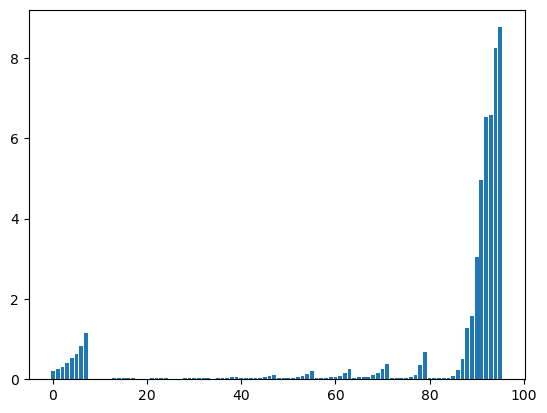

In [ ]:
print(final_results)
plt.bar(range(len(final_results['test_loss'])), final_results['test_loss']) # predictions for last 8 looks bad, let

In [ ]:
pd.concat([outdf[outdf.columns.to_list()[-8:]].min(), 
              outdf[outdf.columns.to_list()[-8:]].max()],
          axis=1)

,0,1
Gybe Angles 6 kt,129.500000,180.0
Gybe Angles 8 kt,138.800003,180.0
Gybe Angles 10 kt,139.600006,180.0
Gybe Angles 12 kt,136.000000,180.0
Gybe Angles 14 kt,133.199997,180.0
Gybe Angles 16 kt,134.699997,180.0
Gybe Angles 20 kt,132.399994,180.0
Gybe Angles 24 kt,132.699997,180.0


In [ ]:

def train2(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module, 
          optimizer: torch.optim.Optimizer, 
          epochs: int, 
          lr_start: int,
          lr_end: int,
          device: torch.device = device):
    
    def lr_lambda(epoch):
        return (lr_end / lr_start) ** (epoch / EPOCHS)
    
    results = {"train_loss": [], 
               "test_loss": []}
    
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)
    
    for epoch in range(epochs):
        train_loss = train_step(model=model, 
                                dataloader=train_dataloader, 
                                loss_fn=loss_fn, 
                                optimizer=optimizer,
                                device=device)
        test_loss = test_step(model=model, 
                              dataloader=test_dataloader, 
                              loss_fn=loss_fn,
                              device=device)
        scheduler.step()
        
        print(f"epoch: {epoch}, train_loss: {train_loss:.4f}, test_loss: {test_loss:.4f}")
        results['train_loss'].append(train_loss)
        results['test_loss'].append(test_loss)
    return results

In [ ]:
class yachtModel8(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units1),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units1, out_features=hidden_units2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units1, out_features=output_shape), 
            nn.ReLU(),
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
def train_models2( X_train: pd.DataFrame, 
                  y_train: pd.DataFrame,
                  X_test: pd.DataFrame, 
                  y_test: pd.DataFrame,
                  device: torch.device = device):
  
    models = {}
    final_results2 = {"train_loss": [], 
               "test_loss": []}
     
    for column in [y_train.columns.to_list()[-1]]:
        # making datasets 
        train_dataset = MyDataset(X_train, y_train[column])
        test_dataset = MyDataset(X_test, y_test[column]) 

        # making dataloader
        train_dataloader = DataLoader(dataset=train_dataset, 
                                        batch_size=32,
                                        shuffle=True, 
                                        num_workers=os.cpu_count())
        test_dataloader = DataLoader(dataset=test_dataset, 
                                    batch_size=32, 
                                    shuffle=False, 
                                    num_workers=os.cpu_count())
        
        # making model
        IN_FEATURES = len(indf.columns)
        HIDDEN_UNITS1 = 128
        HIDDEN_UNITS2 = 64
        OUT_FEATURES = 1
        EPOCHS=5
        start_lr = 0.001
        end_lr = 0.0001
        

        torch.manual_seed(42) 
        models[column] = yachtModel8(input_shape=IN_FEATURES, # this is with relu
                        hidden_units1=HIDDEN_UNITS1,
                        hidden_units2=HIDDEN_UNITS2,
                        output_shape=OUT_FEATURES).to(device)

        loss_fun = nn.HuberLoss()
        optimizer = torch.optim.Adam(params=models[column].parameters(),
                                    lr=start_lr)

        model_results = train2(model=models[column], 
                                train_dataloader=train_dataloader, 
                                test_dataloader=test_dataloader, 
                                loss_fn=loss_fun, 
                                optimizer=optimizer, 
                                epochs=EPOCHS,
                                lr_start=start_lr,
                                lr_end=end_lr, 
                                device=device)
        final_results2["train_loss"].append(model_results["train_loss"][-1])
        final_results2["test_loss"].append(model_results["test_loss"][-1])
        
        # saving model
        torch.save(models[column].state_dict(), "../models/" + str(column))
    
    return final_results2

final_results2 = train_models2(X_train=X_train,
                             y_train=y_train,
                             X_test=X_test, 
                             y_test=y_test,
                             device=device)

epoch: 0, train_loss: 41.3045, test_loss: 10.2907
epoch: 1, train_loss: 8.5223, test_loss: 8.8348
epoch: 2, train_loss: 7.7021, test_loss: 7.8635
epoch: 3, train_loss: 6.8762, test_loss: 7.1116
epoch: 4, train_loss: 6.4266, test_loss: 7.3801


cel above I found best nn setings for last elemnet, now i will apply it to last row (last 8 elements) i have to predict
protips for future: when you serach for best setting it's good to make extra one cell with best setting for later to not loss it 

In [ ]:
class yachtModel8(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units1),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units1, out_features=hidden_units2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units1, out_features=output_shape), 
            nn.ReLU(),
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
def train_models2( X_train: pd.DataFrame, 
                  y_train: pd.DataFrame,
                  X_test: pd.DataFrame, 
                  y_test: pd.DataFrame,
                  device: torch.device = device):
  
    models = {}
    final_results2 = {"train_loss": [], 
               "test_loss": []}
     
    for column in y_train.columns.to_list()[-8:]:
        # making datasets 
        train_dataset = MyDataset(X_train, y_train[column])
        test_dataset = MyDataset(X_test, y_test[column]) 

        # making dataloader
        train_dataloader = DataLoader(dataset=train_dataset, 
                                        batch_size=32,
                                        shuffle=True, 
                                        num_workers=os.cpu_count())
        test_dataloader = DataLoader(dataset=test_dataset, 
                                    batch_size=32, 
                                    shuffle=False, 
                                    num_workers=os.cpu_count())
        
        # making model
        IN_FEATURES = len(indf.columns)
        HIDDEN_UNITS1 = 128
        HIDDEN_UNITS2 = 64
        OUT_FEATURES = 1
        EPOCHS=150
        start_lr = 0.001
        end_lr = 0.0001
        

        torch.manual_seed(42) 
        models[column] = yachtModel8(input_shape=IN_FEATURES, # this is with relu
                        hidden_units1=HIDDEN_UNITS1,
                        hidden_units2=HIDDEN_UNITS2,
                        output_shape=OUT_FEATURES).to(device)

        loss_fun = nn.HuberLoss()
        optimizer = torch.optim.Adam(params=models[column].parameters(),
                                    lr=start_lr)

        model_results = train2(model=models[column], 
                                train_dataloader=train_dataloader, 
                                test_dataloader=test_dataloader, 
                                loss_fn=loss_fun, 
                                optimizer=optimizer, 
                                epochs=EPOCHS,
                                lr_start=start_lr,
                                lr_end=end_lr, 
                                device=device)
        final_results2["train_loss"].append(model_results["train_loss"][-1])
        final_results2["test_loss"].append(model_results["test_loss"][-1])
        
        # saving model
        torch.save(models[column].state_dict(), "../models/" + str(column))
    
    return final_results2

final_results2 = train_models2(X_train=X_train,
                             y_train=y_train,
                             X_test=X_test, 
                             y_test=y_test,
                             device=device)

{'train_loss': [0.637565661930708, 0.8637025017536223, 1.121680630944592, 0.9420726663307335, 1.8969165800351997, 1.8721429596310255, 2.036621178310223, 3.475432942895328], 'test_loss': [0.6292900626790033, 0.8038282231108783, 1.4680226371712881, 1.1668217521007747, 1.930725193186982, 2.655328472999677, 3.272263767784589, 3.5069526858525735]}


<BarContainer object of 8 artists>

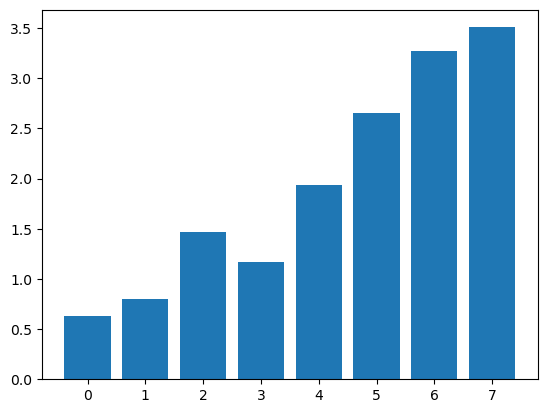

In [ ]:
print(final_results2)
plt.bar(range(len(final_results2['test_loss'])), final_results2['test_loss']) # predictions for last 8 

In [ ]:
len(indf.columns)

25